In [ ]:
import pyttsx3
import datetime
import webbrowser
import random
import requests
import json
import pytz
import speech_recognition as sr
import matplotlib.pyplot as plt
import pygame
import numpy as np

print("\t\t\t\t\tWelcome to team 23's assisstent")
print("\t\t\t\t\t______________________________")
print("\t\t\t\t\toption 1: get news")
print("\t\t\t\t\toption 2: tell joke")
print("\t\t\t\t\toption 3: get time")
print("\t\t\t\t\toption 4: youtube")
print("\t\t\t\t\toption 5: spotify")
print("\t\t\t\t\toption 6: draw indian flag")
print("\t\t\t\t\toption 7: titanic model")
print("\t\t\t\t\toption 8: Volume Controller")




# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Initialize the speech recognizer
recognizer = sr.Recognizer()

# Set up the voice assistant's greetings
greetings = {
    "morning": "Good morning, Ayush!,How may i assist you",
    "afternoon": "Good afternoon, Ayush!,How may i assist you",
    "evening": "Good evening, Ayush!, How may i assist you"
}

# Function to get the current time and determine the appropriate greeting
def get_greeting():
    current_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata')).time()
    if current_time.hour < 12:
        return greetings["morning"]
    elif 12 <= current_time.hour < 18:
        return greetings["afternoon"]
    else:
        return greetings["evening"]

# Function to speak the given text
def speak(text):
    engine.say(text)
    engine.runAndWait()

# Function to open a specific website
def open_website(url):
    webbrowser.open(url)

# Function to fetch the latest news headlines
def get_news():
    api_key = "YOUR_NEWS_API_KEY"  # Replace with your own News API key
    url = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={api_key}"
    response = requests.get(url)
    data = json.loads(response.text)
    if data["status"] == "ok":
        articles = data["articles"]
        for article in articles[:5]:
            speak(article["title"])
            print(article["title"])

# Function to tell a joke
def tell_joke():
    jokes = [
        "Why don't scientists trust atoms? Because they make up everything!",
        "Did you hear about the mathematician who's afraid of negative numbers? He will stop at nothing to avoid them!",
        "Why don't skeletons fight each other? They don't have the guts!",
        "Why don't eggs tell jokes? Because they might crack up!",
        "Why did the scarecrow win an award? Because he was outstanding in his field!"
    ]
    joke = random.choice(jokes)
    speak(joke)
    print(joke)

# Function to get the current time and speak it
def get_current_time():
    current_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata')).strftime("%I:%M %p")
    speak(f"The current time is {current_time}")
    print(f"The current time is {current_time}")
    
def titanic():
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score


# Step 1: Load the dataset
    url = 'https://www.kaggle.com/datasets/yasserh/titanic-dataset'
    df = pd.read_csv('train.csv')

# Step 2: Data preprocessing
# Drop irrelevant columns
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare',"Embarked"], axis=1)

# Fill missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Split features and target variable
    X = df.drop('Survived', axis=1)
    y = df['Survived']

# Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model training
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

# Step 4: Predict on test set
    y_pred = model.predict(X_test)

# Step 5: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy}")
    Pclass=int(input("Enter the Passenger class of the passenger: \n"))
    gender=input("Enter the gender of the passenger M for male F for female: \n")
    if gender=="M":
        s=1
    elif gender=="F":
        s=0
    else:
        print("Enter valid gender cause LGBTQ is just a disease")
    age=float(input("Enter the age of passenger: \n"))
    sib=int(input("Enter sibling count: \n"))
    pc=int(input("Enter the number of children of the passenger: \n"))
    sur=model.predict([[Pclass,s,age,sib,pc]])
    if sur[0]==1:
        print("The passenger survived")
    else:
        print("The passenger died")
        

    
def draw_indian_flag():
    # Dimensions of the flag

    import numpy as np
    import matplotlib.pyplot as py
    import matplotlib.patches as patch
#Plotting the tri colours in national flag
    a = patch.Rectangle((0,1), width=12, height=2, facecolor='green', edgecolor='grey')
    b = patch.Rectangle((0,3), width=12, height=2, facecolor='white', edgecolor='grey')
    c = patch.Rectangle((0,5), width=12, height=2, facecolor='#FF9933', edgecolor='grey')
    m,n = py.subplots()
    n.add_patch(a)
    n.add_patch(b)
    n.add_patch(c)
#AshokChakra Circle
    radius=0.8
    py.plot(6,4, marker = 'o', markerfacecolor = '#000088ff', markersize = 9.5)
    chakra = py.Circle((6, 4), radius, color='#000088ff', fill=False, linewidth=7)
    n.add_artist(chakra)
#24 spokes in AshokChakra
    for i in range(0,24):
       p = 6 + radius/2 * np.cos(np.pi*i/12 + np.pi/48)
       q = 6 + radius/2 * np.cos(np.pi*i/12 - np.pi/48)
       r = 4 + radius/2 * np.sin(np.pi*i/12 + np.pi/48)
       s = 4 + radius/2 * np.sin(np.pi*i/12 - np.pi/48)
       t = 6 + radius * np.cos(np.pi*i/12)
       u = 4 + radius * np.sin(np.pi*i/12)
       n.add_patch(patch.Polygon([[6,4], [p,r], [t,u],[q,s]], fill=True, closed=True, color='#000088ff'))
    py.axis('equal')
    py.show()
    

    # Load and play the national anthem
    pygame.mixer.init()
    pygame.mixer.music.load('national_anthem.mp3')
    pygame.mixer.music.play()

    # Wait for the anthem to finish playing
    while pygame.mixer.music.get_busy():
        continue
        
def volume():
    import cv2      #library for image
    import mediapipe as mp  #tasks like hand tracking, pose estimation, object detection, and more. 
    from math import hypot  #hypot - returns the Euclidean norm (distance from the origin to the coordinates given)
    from ctypes import cast, POINTER    #enable you to define the necessary data types, call functions from shared libraries, pass data between Python and C, and handle error conditions.
    from comtypes import CLSCTX_ALL     
    from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
    import numpy as np
    


#connect to the default camera
    cap = cv2.VideoCapture(0)   


#initialize mediapipe hands
    mp_Hands = mp.solutions.hands   #detect the landmarks of the hands in an image
    hands = mp_Hands.Hands()
    mp_Draw = mp.solutions.drawing_utils
    import cv2
    import mediapipe as mp
    from math import hypot
    from ctypes import cast, POINTER
    from comtypes import CLSCTX_ALL
    from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
    import numpy as np
    import pygame
    
    # Initialize Pygame mixer for audio playback
    pygame.mixer.init()
    
    # Connect to the default camera
    cap = cv2.VideoCapture(0)
    
    # Initialize mediapipe hands
    mp_Hands = mp.solutions.hands
    hands = mp_Hands.Hands()
    mp_Draw = mp.solutions.drawing_utils
    
    # Accessing the speakers using pycaw
    devices = AudioUtilities.GetSpeakers()
    interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
    volume = cast(interface, POINTER(IAudioEndpointVolume))
    
# Find the volume range between the minimum and maximum volume
    volMin, volMax = volume.GetVolumeRange()[:2]

# Create a Pygame mixer channel for music playback
    music_channel = pygame.mixer.Channel(0)

# Capturing an image from the camera
    while True:
        status, image = cap.read()
        imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(imageRGB)

        lmlist = []

        if results.multi_hand_landmarks:
            for handlandmark in results.multi_hand_landmarks:
                for id, lm in enumerate(handlandmark.landmark):
                    h, w, c = image.shape
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    lmlist.append([id, cx, cy])
                mp_Draw.draw_landmarks(image, handlandmark, mp_Hands.HAND_CONNECTIONS)

        if lmlist != []:
            x1, y1 = lmlist[4][1], lmlist[4][2]
            x2, y2 = lmlist[8][1], lmlist[8][2]

            cv2.circle(image, (x1, y1), 15, (255, 0, 0), cv2.FILLED)
            cv2.circle(image, (x2, y2), 15, (255, 0, 0), cv2.FILLED)
            cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)

            length = hypot(x2 - x1, y2 - y1)
            vol = np.interp(length, [15, 220], [volMin, volMax])

            volume.SetMasterVolumeLevel(vol, None)

        # Play/pause music when hand distance crosses a threshold
            if length < 50:
                if pygame.mixer.music.get_busy():
                    pygame.mixer.music.pause()
                else:
                    pygame.mixer.music.unpause()

        cv2.imshow('Image', image)
        if cv2.waitKey(1) == 27:  # Press ESC to exit
            break

    cap.release()
    cv2.destroyAllWindows()
        
        

# Greet Ayush based on the time zone
greeting = get_greeting()
speak(greeting)
print(greeting)

# Main loop for voice assistant commands
# Main loop for voice assistant commands
while True:
    with sr.Microphone() as source:
        print("Listening...")
        audio = recognizer.listen(source)

    try:
        command = recognizer.recognize_google(audio).lower()
        print("Command:", command)

        if "youtube" in command:
            speak("Opening YouTube...")
            open_website("https://www.youtube.com")
            break

        elif "spotify" in command:
            speak("Opening Spotify...")
            open_website("https://www.spotify.com")
            break

        elif "news" in command:
            speak("Sure, here are some headlines...")
            open_website("https://www.ndtv.com")
            break

        elif "joke" in command:
            tell_joke()
            break

        elif "time" in command:
            get_current_time()
            break
         
        elif "flag" in command:
            draw_indian_flag()
            break

        elif "bye" in command:
            speak("Goodbye!")
            print("Goodbye!")
            break
       
        elif "titanic" in command:
            titanic()
            break
            
        elif "volume" in command:
            volume()
            break
            

        else:
            speak("Sorry, I didn't understand that command. Please try again.")
            print("Sorry, I didn't understand that command. Please try again.")

    except sr.UnknownValueError:
        speak("Sorry, I couldn't understand your command. Please try again.")
        print("Sorry, I couldn't understand your command. Please try again.")

    except sr.RequestError:
        speak("Sorry, there was an issue with the speech recognition service. Please try again.")
        print("Sorry, there was an issue with the speech recognition service. Please try again.")
        



pygame 2.5.0 (SDL 2.28.0, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
					Welcome to team 23's assisstent
					______________________________
					option 1: get news
					option 2: tell joke
					option 3: get time
					option 4: youtube
					option 5: spotify
					option 6: draw indian flag
					option 7: titanic model
					option 8: Volume Controller
Good afternoon, Ayush!,How may i assist you
Listening...


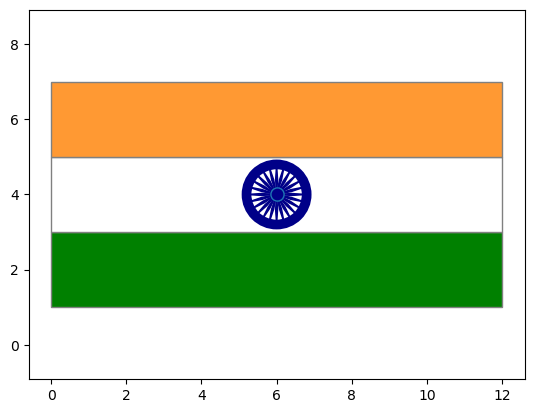

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ayush\Desktop\Machine learning\sample_project_1\env\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\ayush\AppData\Local\Temp\ipykernel_24508\675391080.py", line 132, in draw_indian_flag
    pygame.mixer.init()
NameError: name 'pygame' is not defined


Enter the Passenger class of the passenger: 
2
Enter the gender of the passenger M for male F for female: 

Enter valid gender cause LGBTQ is just a disease
Enter the age of passenger: 



Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ayush\Desktop\Machine learning\sample_project_1\env\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\ayush\AppData\Local\Temp\ipykernel_24508\675391080.py", line 90, in titanic
    age=float(input("Enter the age of passenger: \n"))
ValueError: could not convert string to float: ''


Enter the Passenger class of the passenger: 
2
Enter the gender of the passenger M for male F for female: 
M
Enter the age of passenger: 
34
Enter sibling count: 
2
Enter the number of children of the passenger: 
3


C:\Users\ayush\Desktop\Machine learning\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The passenger died


In [1]:
import tkinter as tk
import webbrowser
import random
import pytz
import requests
import json
import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def open_website(url):
    webbrowser.open(url)

def get_news():
    api_key = "YOUR_NEWS_API_KEY"  # Replace with your own News API key
    url = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={api_key}"
    response = requests.get(url)
    data = json.loads(response.text)
    if data["status"] == "ok":
        articles = data["articles"]
        for article in articles[:5]:
            print(article["title"])

def tell_joke():
    jokes = [
        "Why don't scientists trust atoms? Because they make up everything!",
        "Did you hear about the mathematician who's afraid of negative numbers? He will stop at nothing to avoid them!",
        "Why don't skeletons fight each other? They don't have the guts!",
        "Why don't eggs tell jokes? Because they might crack up!",
        "Why did the scarecrow win an award? Because he was outstanding in his field!"
    ]
    joke = random.choice(jokes)
    print(joke)

def get_current_time():
    current_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata')).strftime("%I:%M %p")
    print(f"The current time is {current_time}")

def titanic():
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score


# Step 1: Load the dataset
    url = 'https://www.kaggle.com/datasets/yasserh/titanic-dataset'
    df = pd.read_csv('train.csv')

# Step 2: Data preprocessing
# Drop irrelevant columns
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare',"Embarked"], axis=1)

# Fill missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Split features and target variable
    X = df.drop('Survived', axis=1)
    y = df['Survived']

# Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model training
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

# Step 4: Predict on test set
    y_pred = model.predict(X_test)

# Step 5: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy}")
    Pclass=int(input("Enter the Passenger class of the passenger: \n"))
    gender=input("Enter the gender of the passenger M for male F for female: \n")
    if gender=="M":
        s=1
    elif gender=="F":
        s=0
    else:
        print("Enter valid gender cause LGBTQ is just a disease")
    age=float(input("Enter the age of passenger: \n"))
    sib=int(input("Enter sibling count: \n"))
    pc=int(input("Enter the number of children of the passenger: \n"))
    sur=model.predict([[Pclass,s,age,sib,pc]])
    if sur[0]==1:
        print("The passenger survived")
    else:
        print("The passenger died")

def draw_indian_flag():
    # Dimensions of the flag

    import numpy as np
    import matplotlib.pyplot as py
    import matplotlib.patches as patch
#Plotting the tri colours in national flag
    a = patch.Rectangle((0,1), width=12, height=2, facecolor='green', edgecolor='grey')
    b = patch.Rectangle((0,3), width=12, height=2, facecolor='white', edgecolor='grey')
    c = patch.Rectangle((0,5), width=12, height=2, facecolor='#FF9933', edgecolor='grey')
    m,n = py.subplots()
    n.add_patch(a)
    n.add_patch(b)
    n.add_patch(c)
#AshokChakra Circle
    radius=0.8
    py.plot(6,4, marker = 'o', markerfacecolor = '#000088ff', markersize = 9.5)
    chakra = py.Circle((6, 4), radius, color='#000088ff', fill=False, linewidth=7)
    n.add_artist(chakra)
#24 spokes in AshokChakra
    for i in range(0,24):
       p = 6 + radius/2 * np.cos(np.pi*i/12 + np.pi/48)
       q = 6 + radius/2 * np.cos(np.pi*i/12 - np.pi/48)
       r = 4 + radius/2 * np.sin(np.pi*i/12 + np.pi/48)
       s = 4 + radius/2 * np.sin(np.pi*i/12 - np.pi/48)
       t = 6 + radius * np.cos(np.pi*i/12)
       u = 4 + radius * np.sin(np.pi*i/12)
       n.add_patch(patch.Polygon([[6,4], [p,r], [t,u],[q,s]], fill=True, closed=True, color='#000088ff'))
    py.axis('equal')
    py.show()
    

    # Load and play the national anthem
    pygame.mixer.init()
    pygame.mixer.music.load('national_anthem.mp3')
    pygame.mixer.music.play()

    # Wait for the anthem to finish playing
    while pygame.mixer.music.get_busy():
        continue

def volume():
    
    import cv2
    import mediapipe as mp
    from math import hypot
    from ctypes import cast, POINTER
    from comtypes import CLSCTX_ALL
    from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
    import numpy as np
    import pygame
    
    # Initialize Pygame mixer for audio playback
    pygame.mixer.init()
    
    # Connect to the default camera
    cap = cv2.VideoCapture(0)
    
    # Initialize mediapipe hands
    mp_Hands = mp.solutions.hands
    hands = mp_Hands.Hands()
    mp_Draw = mp.solutions.drawing_utils
    
    # Accessing the speakers using pycaw
    devices = AudioUtilities.GetSpeakers()
    interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
    volume = cast(interface, POINTER(IAudioEndpointVolume))
    
# Find the volume range between the minimum and maximum volume
    volMin, volMax = volume.GetVolumeRange()[:2]

# Create a Pygame mixer channel for music playback
    music_channel = pygame.mixer.Channel(0)

# Capturing an image from the camera
    while True:
        status, image = cap.read()
        imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(imageRGB)

        lmlist = []

        if results.multi_hand_landmarks:
            for handlandmark in results.multi_hand_landmarks:
                for id, lm in enumerate(handlandmark.landmark):
                    h, w, c = image.shape
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    lmlist.append([id, cx, cy])
                mp_Draw.draw_landmarks(image, handlandmark, mp_Hands.HAND_CONNECTIONS)

        if lmlist != []:
            x1, y1 = lmlist[4][1], lmlist[4][2]
            x2, y2 = lmlist[8][1], lmlist[8][2]

            cv2.circle(image, (x1, y1), 15, (255, 0, 0), cv2.FILLED)
            cv2.circle(image, (x2, y2), 15, (255, 0, 0), cv2.FILLED)
            cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)

            length = hypot(x2 - x1, y2 - y1)
            vol = np.interp(length, [15, 220], [volMin, volMax])

            volume.SetMasterVolumeLevel(vol, None)

        # Play/pause music when hand distance crosses a threshold
            if length < 50:
                if pygame.mixer.music.get_busy():
                    pygame.mixer.music.pause()
                else:
                    pygame.mixer.music.unpause()

        cv2.imshow('Image', image)
        if cv2.waitKey(1) == 27:  # Press ESC to exit
            break

    cap.release()
    cv2.destroyAllWindows()

# Create the main window
root = tk.Tk()
root.title("Team 23's Assistant")

# Create buttons for each function
news_button = tk.Button(root, text="Get News", command=lambda: open_website("https://www.ndtv.com/"))
joke_button = tk.Button(root, text="Tell Joke", command=tell_joke)
time_button = tk.Button(root, text="Get Time", command=get_current_time)
youtube_button = tk.Button(root, text="Open YouTube", command=lambda: open_website("https://www.youtube.com"))
spotify_button = tk.Button(root, text="Open Spotify", command=lambda: open_website("https://www.spotify.com"))
flag_button = tk.Button(root, text="Draw Indian Flag", command=draw_indian_flag)
titanic_button = tk.Button(root, text="Titanic Model", command=titanic)
volume_button = tk.Button(root, text="Volume Controller", command=volume)

# Arrange the buttons on the GUI
news_button.pack()
joke_button.pack()
time_button.pack()
youtube_button.pack()
spotify_button.pack()
flag_button.pack()
titanic_button.pack()
volume_button.pack()

# Start the GUI event loop
root.mainloop()
